# Image process using openCV
by Jenny Zeng

It will extract hist bins of an image to be the features

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import mltools as ml

In [2]:
# parameters
NUM_BINS = 8 # number of bins for each channel
COLOR = ('b','g','r') # channel order in array
IMG_DIR_PATH = [('/notebooks/Minecraft-AI/mc-data/mesa_splited/**/*.jpg',0),
               ('/notebooks/Minecraft-AI/mc-data/forest_splited/**/*.jpg',1),
               ('/notebooks/Minecraft-AI/mc-data/desert_splited/**/*.jpg',2),
               ('/notebooks/Minecraft-AI/mc-data/jungle_splited/**/*.jpg', 3)]
FILE_SAVE_PATH = '/notebooks/Minecraft-AI/mc-data/mesa_forest_desert_jungle.txt'
labels ={"mesa":0, "forest":1, "desert":2, 'jungle':3}

## Analyze a sinlge image

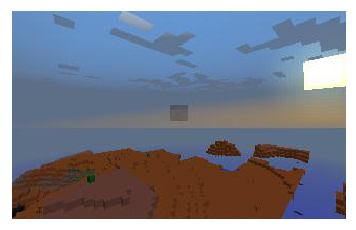

In [3]:
IMG_PATH='/notebooks/Minecraft-AI/mc-data/mesa/mesa_rgb/mesa_10.jpg'
img=cv2.imread(IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## historgram of the image



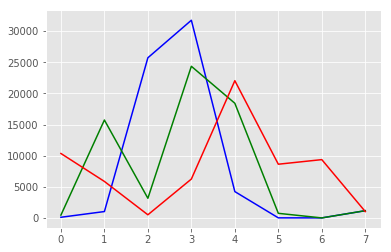

In [4]:
hist = np.zeros((NUM_BINS,3))
bins = np.linspace(0, 256, NUM_BINS)
for i,col in enumerate(COLOR):
    histr = cv2.calcHist([img],[i],None,[NUM_BINS],[0,256])
    plt.plot(histr, color=col)
    hist[:,i] = histr[:,0]
plt.show()

histr is an array with shape (NUM_BINS,1), that is 8 bins and 1 channel if NUM_BINS=8

In [5]:
histr.shape

(8, 1)

hist is an array with shape (NUM_BINS,3), hist is what we want to store as the features of an image

In [6]:
hist.shape

(8, 3)

reshape hist to be an 1-d array

In [7]:
hist = hist.flatten()
hist

array([  1.07000000e+02,   4.55000000e+02,   1.03470000e+04,
         1.02400000e+03,   1.57200000e+04,   5.86000000e+03,
         2.57170000e+04,   3.15600000e+03,   5.05000000e+02,
         3.17430000e+04,   2.43500000e+04,   6.24300000e+03,
         4.22900000e+03,   1.84110000e+04,   2.20360000e+04,
         1.20000000e+01,   7.39000000e+02,   8.62500000e+03,
         8.00000000e+00,   2.00000000e+00,   9.36300000e+03,
         1.16000000e+03,   1.16700000e+03,   1.02100000e+03])

### helper function to convert a image to be data 
with 24 features and 1 label
(a 1-d array with length = 25)

In [8]:
def convertImage(img_path, label):
    img=cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hist = np.zeros((NUM_BINS,3))
    bins = np.linspace(0, 256, NUM_BINS)
    for i,col in enumerate(COLOR):
        histr = cv2.calcHist([img],[i],None,[NUM_BINS],[0,256])
        hist[:,i] = histr[:,0]
    hist = hist.flatten()
    hist = np.append(hist, label)
    return hist

In [9]:
hist = convertImage(IMG_PATH, 0)
hist

array([  1.07000000e+02,   4.55000000e+02,   1.03470000e+04,
         1.02400000e+03,   1.57200000e+04,   5.86000000e+03,
         2.57170000e+04,   3.15600000e+03,   5.05000000e+02,
         3.17430000e+04,   2.43500000e+04,   6.24300000e+03,
         4.22900000e+03,   1.84110000e+04,   2.20360000e+04,
         1.20000000e+01,   7.39000000e+02,   8.62500000e+03,
         8.00000000e+00,   2.00000000e+00,   9.36300000e+03,
         1.16000000e+03,   1.16700000e+03,   1.02100000e+03,
         0.00000000e+00])

In [10]:
hist.shape

(25,)

## save images to a txt file

### helper function on extracting images from a single dir with jpg images
each subdir has the images with the same class

In [11]:
def extractFromSubdir(subdir, label):
    img_files = glob.glob(subdir)
    data = np.array([convertImage(img_dir,label) for img_dir in img_files])
    return data

In [12]:
subdir = '/notebooks/Minecraft-AI/mc-data/mesa/mesa_rgb/*.jpg'
data = extractFromSubdir(subdir,labels["mesa"])

from the example subdir, we get 209 imgs, and each image has 24 features, 1 label

In [13]:
data.shape

(209, 25)

### save all images in subdir of the IMG_DIR_PATH to a txt file

In [14]:
subdir


'/notebooks/Minecraft-AI/mc-data/mesa/mesa_rgb/*.jpg'

In [12]:
subdir, label = IMG_DIR_PATH[0]
data = extractFromSubdir(subdir, label) # assume has >=1 path

In [13]:
for subdir, label in (IMG_DIR_PATH[1:]):
    data = np.vstack((data, extractFromSubdir(subdir, label)))

In [14]:
np.savetxt(FILE_SAVE_PATH, data,delimiter=';',fmt='%.4e')

In [15]:
data.shape

(40442, 25)

## example for loading data from txt

In [23]:
data = np.loadtxt('/notebooks/Minecraft-AI/mc-data/mesa_vs_forest.txt', delimiter=';')

In [24]:
print data.shape

(410, 25)


In [25]:
np.random.shuffle(data)

In [32]:
X = data[:,:-1]
Y = data[:,-1].astype(np.int64)

In [33]:
print X.shape
print Y.shape

(410, 24)
(410,)


In [34]:
Xtr, Xte, Ytr, Yte = ml.splitData(X,Y,train_fraction=0.8)

In [35]:
print Xtr.shape
print Xte.shape
print Ytr.shape
print Yte.shape

(328, 24)
(82, 24)
(328,)
(82,)
